<a href="https://colab.research.google.com/github/mehdi-lamrani/tensorflow/blob/main/clean/KPLR_TF_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Relevant libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

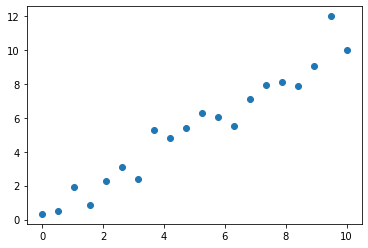

In [ ]:
# Define Learning rate
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 100

# the training dataset
x_train = np.linspace(0, 10, 20)
y_train = x_train + np.random.normal(0,1,20)

# plot of data
plt.scatter(x_train, y_train)

In [ ]:
# declare weight & bias as tf Variables
weight = tf.Variable(0.)
bias = tf.Variable(0.)

In [ ]:
# Define linear regression expression y
def linear_regression(x):
  y = weight * x + bias
  return y

In [ ]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
# train model
for epoch in range(training_epochs):

  # Compute loss within Gradient Tape context
  with tf.GradientTape() as tape:
    y_predicted = linear_regression(x_train)
    loss = squared_error(y_predicted, y_train)

    # Get gradients
    gradients = tape.gradient(loss, [weight,bias])

    # Adjust weights
    weight.assign_sub(gradients[0]*learning_rate)
    bias.assign_sub(gradients[1]*learning_rate)

    # Print output
    print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")


In [ ]:
print(weight.numpy())
print(bias.numpy())

1.0350504
0.15523432


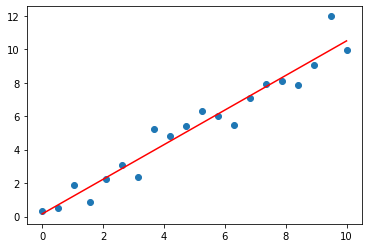

In [ ]:
# Plot the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, linear_regression(x_train), 'r')
plt.show()